In [21]:
import pandas as pd

In [22]:
df= pd.read_csv('/content/Cancer Data.csv')

In [23]:
df=df.iloc[:,0:32]

Identifying Null Values

In [24]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [25]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

([<matplotlib.patches.Wedge at 0x7fe717edf310>,
 [Text(-0.4286546999573329, 1.0130425204326268, 'Benign'),
  Text(0.428654605109445, -1.013042560566172, 'Malignant')])

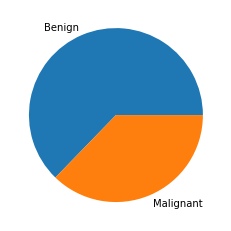

In [26]:
import matplotlib.pyplot as plt
pie=df['diagnosis'].value_counts()
l=['Benign','Malignant']
plt.pie(pie,labels=l)


In [27]:
df['diagnosis']=df['diagnosis'].map({'M':1,"B":0})

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x=df.iloc[:,2:32]

In [30]:
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [31]:
y=df['diagnosis']

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)

In [33]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((398, 30), (171, 30), (398,), (171,))

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler=StandardScaler()
X_train=scaler.fit_transform(x_train)
X_test=scaler.transform(x_test)

In [36]:
from sklearn.svm import SVC

In [58]:
svc=SVC(kernel='linear')
svc.fit(x_train,y_train)

SVC(kernel='linear')

In [59]:
y_pred=svc.predict(x_test)

In [92]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve

In [61]:
accuracy_score(y_test,y_pred)

0.9532163742690059

In [64]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       115
           1       0.93      0.93      0.93        56

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



In [75]:
cm=confusion_matrix(y_test,y_pred)
cm=pd.DataFrame(cm)
col=['Predicted 0','Predicted 1']
cm.columns=col
cm=cm.rename(index={0:'Actual 0',1:'Actual 1'})

In [76]:
cm

,Predicted 0,Predicted 1
Actual 0,111,4
Actual 1,4,52


In [80]:
cm1=np.array(cm)

In [86]:
sensitivity=cm1[0,0]/cm1[0,0]+cm1[1,0]
sensitivity

5.0

In [88]:
specificity=cm1[1,1]/cm1[0,1]+cm1[1,1]
specificity

65.0

In [103]:
roc=roc_auc_score(y_test,y_pred)
print('%0.2f '%(roc))

0.95 


In [106]:
fpr,tpr,_=roc_curve(y_test,y_pred)

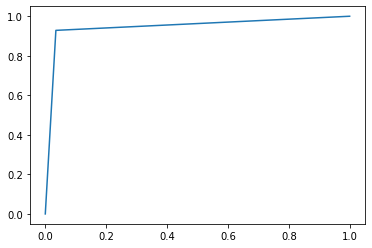

In [108]:
import matplotlib.pyplot as plt
plt.plot(fpr,tpr)